# **Import the required packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.color import rgb2gray
from math import sqrt

# **Import the image**

In [2]:
#Now we will do the morphological operations on image of sunflower
from google.colab import files
uploaded = files.upload()

Saving Coronavirus.tif to Coronavirus.tif


In [3]:
virus = imread('Coronavirus.tif')

**#Convert the image to Binary**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


Text(0.5, 1.0, 'Binary')

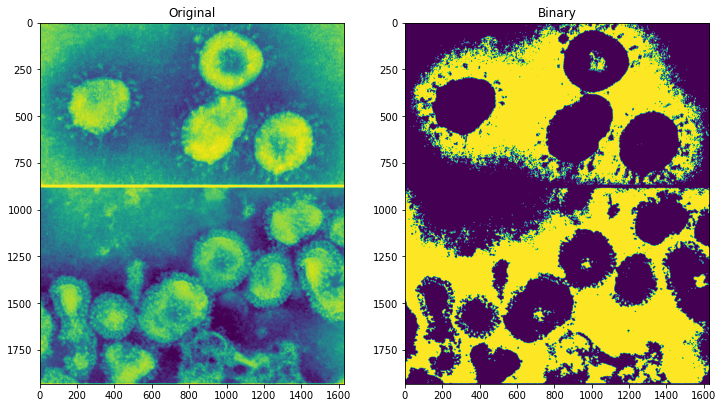

In [16]:
fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(virus);
ax[0].set_title('Original')

binary = rgb2gray(virus)<120
ax[1].imshow(binary)
ax[1].set_title('Binary')

# **Create structural element for Erosion and Dilution**

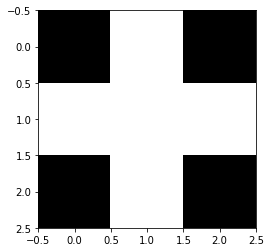

In [17]:
#we will create structural element to be used in erosion and dilation
x = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]])
plt.imshow(x, cmap='gray');

Text(0.5, 1.0, 'Binary')

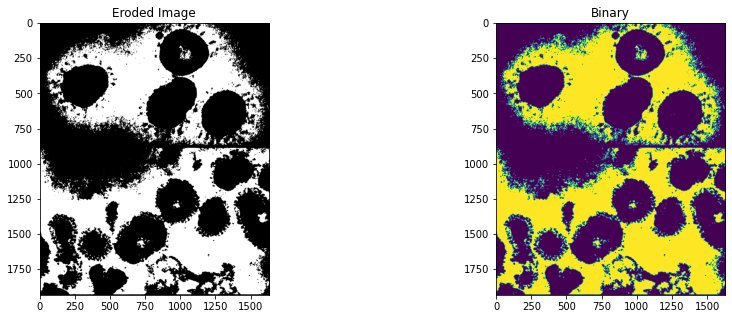

In [18]:
#Erosion- removes small objects so that key features will remain
#Dilation- makes the objects more visible

fig, ax=plt.subplots(1,2,figsize=(15, 5))
ax[0].imshow(erosion(binary, x), cmap='gray');
ax[0].set_title('Eroded Image')

ax[1].imshow(binary)
ax[1].set_title('Binary')

In [19]:
#multiple erosion
def multi_erosion(image, num, x=x):
    for i in range(num):
        image = erosion(image, x)
    return image

In [20]:
def multi_dilution(image, num, x=x):
    for i in range(num):
        image = dilation(image, x)
    return image


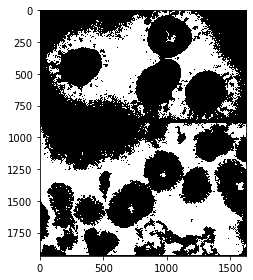

In [21]:
#apply multiple erosion
Eroded_Image = multi_erosion(binary, 2, x)
imshow(Eroded_Image)

Text(0.5, 1.0, 'Binary')

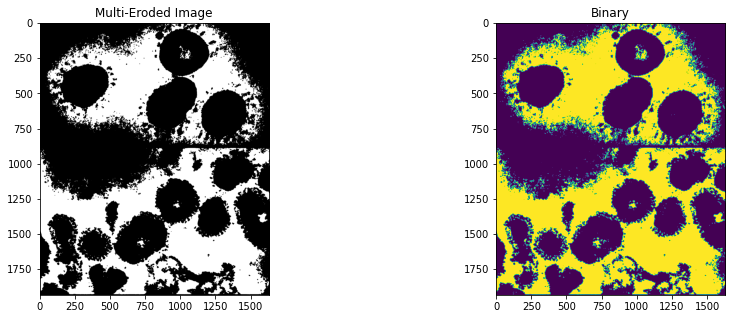

In [22]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(multi_erosion(binary, 2, x), cmap='gray')
ax[0].set_title('Multi-Eroded Image')


ax[1].imshow(binary)
ax[1].set_title('Binary')

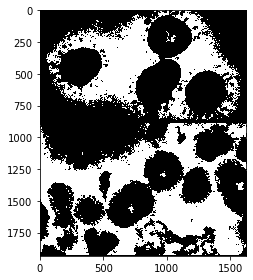

In [23]:
#we will apply the opening function to remove any minor noise left
opened_image = opening(Eroded_Image)
imshow(opened_image)

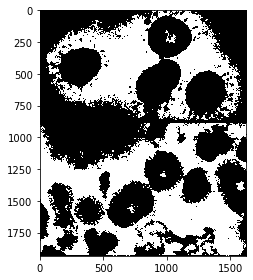

In [24]:
#we will apply dilation function to restore the size of original iage

diluted_image = multi_dilution(opened_image, 2, x)
imshow(diluted_image)

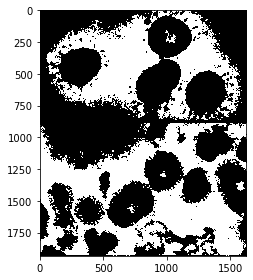

In [25]:
#make the image more clear by using area function
#it does not use a structural element but a deframed shape basis the threshold
morphed_image = area_opening(area_closing(diluted_image, 10), 10)
imshow(morphed_image)

# **Blob Detection using LoG, DoG, and DoH**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.feature import blob_dog, blob_log, blob_doh

In [27]:
virus_morphed =morphed_image

Laplacian of Gaussian (LoG) on this binarized image
We will be only setting the min_sigma parameter on all methods. 
The rest will be the default parameter setting.

#Laplacian of Gaussian (LoG)

In [39]:
blobs = blob_log(virus_morphed, min_sigma=1,threshold=0.1)

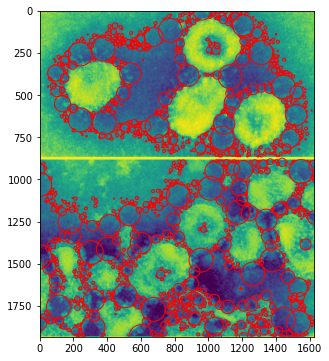

In [40]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(virus)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))

In [41]:
# Calculate the detected features in an image (blobs). This can have wider application and use cases
blobs[:, 2] = blobs[:, 2] * sqrt(2)
numrows = len(blobs)

In [42]:
print("blob counts",numrows)

blob counts 4151


# Difference of Gaussian (DoG)

In [43]:
#Difference of Gaussian (DoG)
blobs = blob_dog(virus_morphed, min_sigma=1,threshold=0.1)

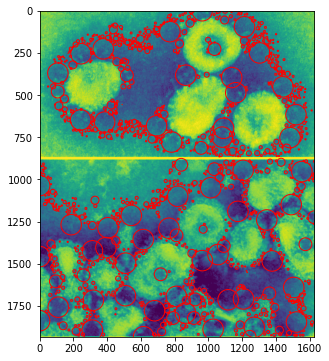

In [44]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(virus)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))

# Determinant of Hessian (DoH)

In [45]:
blobs = blob_doh(virus_morphed, min_sigma=1)

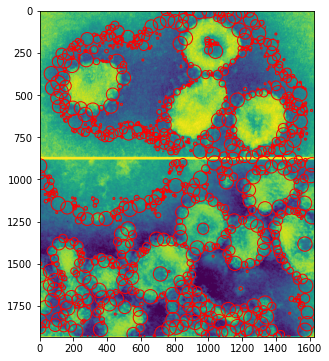

In [46]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(virus)
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), 
                 color='r', fill=False))